# StackOverflow 2018 Survey

## Getting started

1. How many people are there like me? What fraction of this sample - fraction or breakdown/barchart (acknowledge nans)
2. How do I compare with others in terms of years coding - distribution plots
3. How does my group compare with others in terms of years coding
4. Where are the best job opportunities for people like me? (jobs with high job satisfaction)
5. Anything that could boost salary?
6. Other odd things about us (i.e., categories that stand out from rest of population

In [52]:
from   collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from   pathlib import Path
from   pprint import pprint
import seaborn as sns

from   sklearn.preprocessing import Imputer, StandardScaler
from   sklearn.decomposition import PCA
from   sklearn.cluster import MiniBatchKMeans

%matplotlib inline

## Exploratory Data Analysis

In [53]:
csv_path = Path("../data/survey_results_public.csv")
schema_path = Path("../data/survey_results_schema.csv")

In [54]:
df = pd.read_csv(csv_path, low_memory=False)
schema = pd.read_csv(schema_path)

In [55]:
df.shape

(98855, 129)

In [35]:
pprint(list(df.columns))

['Respondent',
 'Hobby',
 'OpenSource',
 'Country',
 'Student',
 'Employment',
 'FormalEducation',
 'UndergradMajor',
 'CompanySize',
 'DevType',
 'YearsCoding',
 'YearsCodingProf',
 'JobSatisfaction',
 'CareerSatisfaction',
 'HopeFiveYears',
 'JobSearchStatus',
 'LastNewJob',
 'AssessJob1',
 'AssessJob2',
 'AssessJob3',
 'AssessJob4',
 'AssessJob5',
 'AssessJob6',
 'AssessJob7',
 'AssessJob8',
 'AssessJob9',
 'AssessJob10',
 'AssessBenefits1',
 'AssessBenefits2',
 'AssessBenefits3',
 'AssessBenefits4',
 'AssessBenefits5',
 'AssessBenefits6',
 'AssessBenefits7',
 'AssessBenefits8',
 'AssessBenefits9',
 'AssessBenefits10',
 'AssessBenefits11',
 'JobContactPriorities1',
 'JobContactPriorities2',
 'JobContactPriorities3',
 'JobContactPriorities4',
 'JobContactPriorities5',
 'JobEmailPriorities1',
 'JobEmailPriorities2',
 'JobEmailPriorities3',
 'JobEmailPriorities4',
 'JobEmailPriorities5',
 'JobEmailPriorities6',
 'JobEmailPriorities7',
 'UpdateCV',
 'Currency',
 'Salary',
 'SalaryType',

In [5]:
schema.shape

(129, 2)

In [6]:
pprint(list(df.FormalEducation.unique()))

['Bachelor’s degree (BA, BS, B.Eng., etc.)',
 'Associate degree',
 'Some college/university study without earning a degree',
 'Master’s degree (MA, MS, M.Eng., MBA, etc.)',
 'Secondary school (e.g. American high school, German Realschule or Gymnasium, '
 'etc.)',
 nan,
 'Primary/elementary school',
 'Professional degree (JD, MD, etc.)',
 'I never completed any formal education',
 'Other doctoral degree (Ph.D, Ed.D., etc.)']


In [7]:
pprint(list(df.UndergradMajor.unique()))

['Mathematics or statistics',
 'A natural science (ex. biology, chemistry, physics)',
 'Computer science, computer engineering, or software engineering',
 'Fine arts or performing arts (ex. graphic design, music, studio art)',
 'Information systems, information technology, or system administration',
 'Another engineering discipline (ex. civil, electrical, mechanical)',
 nan,
 'A business discipline (ex. accounting, finance, marketing)',
 'A social science (ex. anthropology, psychology, political science)',
 'Web development or web design',
 'A humanities discipline (ex. literature, history, philosophy)',
 'A health science (ex. nursing, pharmacy, radiology)',
 'I never declared a major']


In [24]:
undergrad_counter = Counter(df.UndergradMajor)
undergrad_data = pd.Series(dict(undergrad_counter))
undergrad_data = undergrad_data.reset_index()
undergrad_data.columns = ['major', 'count']
undergrad_data

,major,count
0,Mathematics or statistics,2818
1,"A natural science (ex. biology, chemistry, phy...",3050
2,"Computer science, computer engineering, or sof...",50336
3,Fine arts or performing arts (ex. graphic desi...,1135
4,"Information systems, information technology, o...",6507
5,"Another engineering discipline (ex. civil, ele...",6945
6,NaN,19819
7,"A business discipline (ex. accounting, finance...",1921
8,"A social science (ex. anthropology, psychology...",1377
9,Web development or web design,2418


In [8]:
sum(df.FormalEducation == 'Other doctoral degree (Ph.D, Ed.D., etc.)')

2214

In [9]:
sum(df.FormalEducation == 'Master’s degree (MA, MS, M.Eng., MBA, etc.)')

21396

In [10]:
sum(df.UndergradMajor.isin(['A natural science (ex. biology, chemistry, physics)', 'Another engineering discipline (ex. civil, electrical, mechanical)']))

9995

In [11]:
df.isnull().any().sum()

126

In [48]:
pprint(list(df.HopeFiveYears.unique()))

['Working as a founder or co-founder of my own company',
 "Working in a different or more specialized technical role than the one I'm "
 'in now',
 'Doing the same work',
 nan,
 'Working as an engineering manager or other functional manager',
 'Working in a career completely unrelated to software development',
 'Working as a product manager or project manager',
 'Retirement']


In [51]:
answer_options = set()
for answer in df.DevType.unique():
    if answer is not np.nan:
        for item in answer.split(';'):
            answer_options.add(item)
pprint(answer_options)

{'Back-end developer',
 'C-suite executive (CEO, CTO, etc.)',
 'Data or business analyst',
 'Data scientist or machine learning specialist',
 'Database administrator',
 'Designer',
 'Desktop or enterprise applications developer',
 'DevOps specialist',
 'Educator or academic researcher',
 'Embedded applications or devices developer',
 'Engineering manager',
 'Front-end developer',
 'Full-stack developer',
 'Game or graphics developer',
 'Marketing or sales professional',
 'Mobile developer',
 'Product manager',
 'QA or test developer',
 'Student',
 'System administrator'}


# Getting Serious

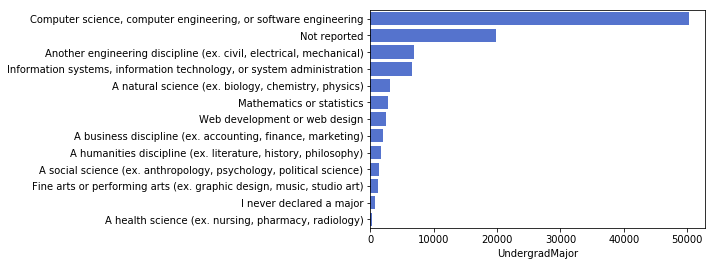

In [91]:
undergrad_breakdown = df.UndergradMajor.fillna('Not reported').value_counts()
sns.barplot(x=undergrad_breakdown, y=undergrad_breakdown.index, color='royalblue')
plt.show()

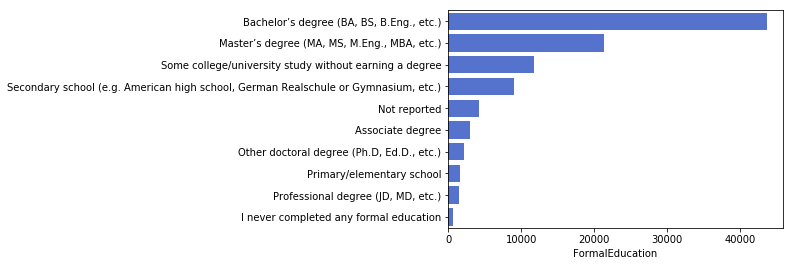

In [92]:
degree_breakdown = df.FormalEducation.fillna('Not reported').value_counts()
sns.barplot(x=degree_breakdown, y=degree_breakdown.index, color='royalblue')
plt.show()

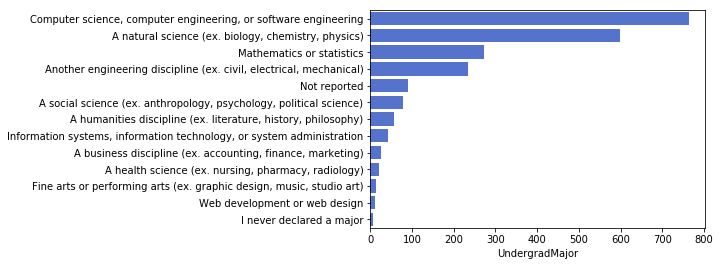

In [95]:
is_phd = df.FormalEducation.fillna('Not reported').str.contains('Other doctoral degree')
phd_field_breakdown = df.UndergradMajor.fillna('Not reported')[is_phd].value_counts()
sns.barplot(x=phd_field_breakdown, y=phd_field_breakdown.index, color='royalblue')
plt.show()

In [111]:
is_phd = df.FormalEducation.fillna('Not reported').str.contains('Other doctoral degree')
is_compscientist = df.UndergradMajor.fillna('Not reported').str.contains('Computer science')
fraction_like_me = len(df[is_phd & ~is_compscientist]) / len(df)
print(f"The fraction of the StackOverflow sample that\n-\thas a PhD, and\n"
      f"-\tdoes not have an undergrad degree in Computer Science\nis {fraction_like_me:.2f}.")

The fraction of the StackOverflow sample that
-	has a PhD, and
-	does not have an undergrad degree in Computer Science
is 0.01.
